<a href="https://colab.research.google.com/github/arthur-siqueira/metodos-numericos/blob/main/projeto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Conceito de Cancelamento Catastrófico**

Cancelamento catastrófico é um erro numérico que surge em operações de subtração entre números muito próximos. Nesses casos, os dígitos mais significativos acabam se anulando e o resultado final vai depender apenas dos dígitos menos confiáveis.

Fazendo com que o erro relativo aumente de forma abrupta. Em computação científica, esse problema compromete a establidade de algoritmos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

 **Caso de Estudo I**

In [2]:
a, b, c = 1.0, 300.0, 0.014
delta = b**2 - 4*a*c

In [3]:
# Fórmula de Bhaskara (com arredondamento a 6 dígitos)
raiz1 = round((-b + np.sqrt(delta)) / (2*a), 6)
raiz2 = round((-b - np.sqrt(delta)) / (2*a), 6)

In [4]:
print("Caso de Estudo I:")
print("Delta:", round(delta, 6))
print("Raiz 1 (cancelamento):", raiz1)
print("Raiz 2:", raiz2)

Caso de Estudo I:
Delta: 89999.944
Raiz 1 (cancelamento): -4.7e-05
Raiz 2: -299.999953


Com o arredondamento em seis dígitos significativos a raiz menor sofre cancelamento catastrófico, pois envolve a subtração de dois números próximos, consequentemente a raiz é altamente imprecisa e o erro relativo cresce drasticamente.

**Caso de Estudo II**

In [5]:
x_vals = [1e-12, 1e-13, 1e-14, 1e-15, 1e-16, 1e-17]
f_vals = [(1+x - 1)/x for x in x_vals]

In [6]:
print("\nCaso de Estudo II:")
for x, f in zip(x_vals, f_vals):
  print(f"x = {x:.0e}, f(x) = {f}")


Caso de Estudo II:
x = 1e-12, f(x) = 1.000088900582341
x = 1e-13, f(x) = 0.9992007221626409
x = 1e-14, f(x) = 0.9992007221626409
x = 1e-15, f(x) = 1.1102230246251565
x = 1e-16, f(x) = 0.0
x = 1e-17, f(x) = 0.0


Quando x se aproxima do ε de máquina, ocorre que a soma (1+x) não é mais distinguível de 1, pois o incremento é menor que a precisão da máquina assim, a expressão (1+x)-1 é avaliada como zero e o quociente passa a ser computado como 0/x = 0, em vez do valor exato f(x) = 1.

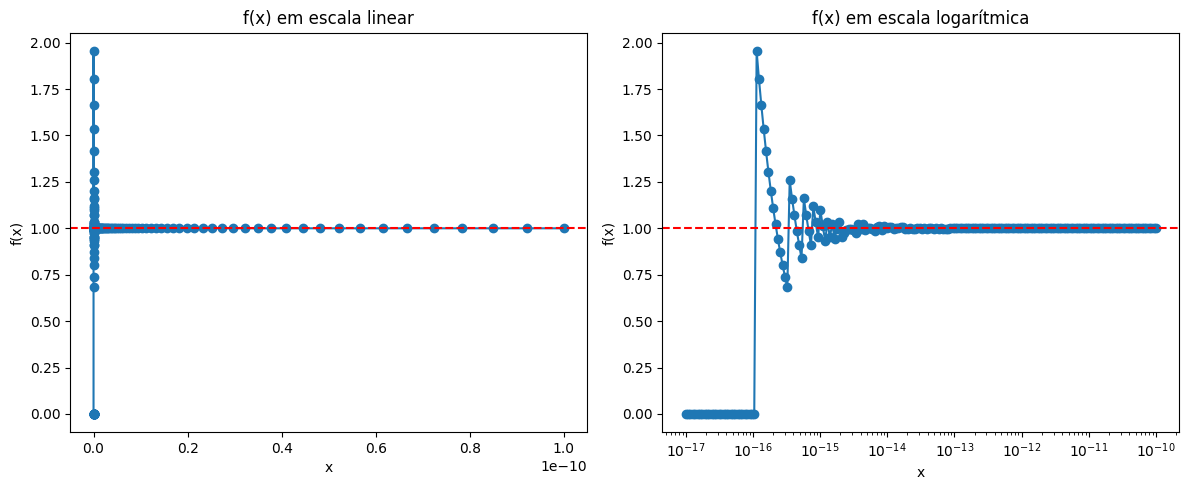

In [9]:
# Gráficos
x_range = np.logspace(-17, -10, 200)
f_range = ((1 + x_range) - 1) / x_range

plt.figure(figsize=(12, 5))

# Escala linear
plt.subplot(1, 2, 1)
plt.plot(x_range, f_range, 'o-')
plt.axhline(1, color='r', linestyle='--')
plt.title("f(x) em escala linear")
plt.xlabel("x")
plt.ylabel("f(x)")

# Escala semilog (log no eixo x)
plt.subplot(1, 2, 2)
plt.semilogx(x_range, f_range, 'o-')
plt.axhline(1, color='r', linestyle='--')
plt.title("f(x) em escala logarítmica")
plt.xlabel("x")
plt.ylabel("f(x)")

plt.tight_layout()
plt.show()

Os dois gráficos mostram esse comportamento:


*   **Escala linear**: evidencia que, para valores pequenos de x, a função se afasta de 1 e chega a 0.
*   **Escala linear-logarítmica**: torna mais clara a região de transição, onde os erros numéricos dominam o resultado.

Possíveis soluções:


*   **Reformulação algébrica**: em vez de usar diretamente (1+x) -1, usar alguma expansão equivalente, como a série de Taylor de ln(1+x) ou alguma outra expressão mais estável.
*   **Aritmética de maior precisão**: usar bibliotecas de precisão estendida como decimal ou mpmath em python.



